# Cryptocurrency Analysis with Python - Buy and Hold

In this part, I am going to analyze which coin (Axie Infinity, Sandbox, Gala, Ape and BNX) was the most profitable in last two months if we would invest using buy and hold strategy. 
We'll go through the analysis of these 5 cryptocurrencies and try to give an objective answer.


## Getting the data



First, we download daily data for BTC, ETH and LTC from Coinbase exchange.
This time we work with hourly time interval as it has higher granularity.


In [46]:
import pandas as pd

def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    '''df.datetime = pd.to_datetime(df.date) # change type from object to datetime'''
    df = df.set_index('Date') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

## Load the data

In [58]:
df_sand = read_dataset(get_filename('SAND', 'USD', 'Coinbase', 'day', '2022-09-30'))
df_axs = read_dataset(get_filename('AXS', 'USD', 'Coinbase', 'day', '2022-09-30'))
df_gala = read_dataset(get_filename('GALA', 'USD', 'Coinbase', 'day', '2022-09-30'))
df_bnx = read_dataset(get_filename('BNX', 'USD', 'Coinbase', 'day', '2022-09-30'))
df_ape = read_dataset(get_filename('APE', 'USD', 'Coinbase', 'day', '2022-09-30'))

Reading data from SAND_USD_Coinbase_day_2022-09-30.csv
(3084, 6)
Reading data from AXS_USD_Coinbase_day_2022-09-30.csv
(3085, 6)
Reading data from GALA_USD_Coinbase_day_2022-09-30.csv
(729, 6)
Reading data from BNX_USD_Coinbase_day_2022-09-30.csv
(519, 6)
Reading data from APE_USD_Coinbase_day_2022-09-30.csv
(28, 6)


In [59]:
df_axs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,29.730000,29.809999,29.200001,29.639999,21.302589,1158900
2010-07-02,29.889999,29.969999,29.450001,29.570000,21.252270,471000
2010-07-06,30.110001,30.110001,29.320000,29.540001,21.230717,726600
2010-07-07,29.620001,30.760000,29.590000,30.750000,22.100357,911900
2010-07-08,31.160000,31.200001,30.780001,31.040001,22.308781,638900


## Extract closing prices

We are going to analyze closing prices, which are prices at which the hourly period closed. 
We merge BTC, ETH and LTC closing prices to a Dataframe to make analysis easier.

In [62]:
df = pd.DataFrame({'AXS': df_axs.Close,
                   'GALA': df_gala.Close,
                   'SAND': df_sand.Close,
                   'BNX': df_bnx.Close,
                   'APE': df_ape.Close})

In [63]:
df.head()

,AXS,GALA,SAND,BNX,APE
2010-07-01,29.639999,NaN,3.15,NaN,NaN
2010-07-02,29.570000,NaN,3.10,NaN,NaN
2010-07-06,29.540001,NaN,2.85,NaN,NaN
2010-07-07,30.750000,NaN,3.15,NaN,NaN
2010-07-08,31.040001,NaN,3.15,NaN,NaN


## Analysis

### Basic statistics

In 2.7 months, all three cryptocurrencies fluctuated a lot as you can observe in the table below. 

For each coin, we count the number of events and calculate mean, standard deviation, minimum, quartiles and maximum closing price. Quartiles divide the data into four equal groups, each group comprising a quarter of the data.

**Few interesting facts**
- The difference between the highest and the lowest BTC price was more than \$15000 in 2.7 months.
- The LTC surged from \$48.61 to \$378.66 at a certain point, which is an increase of 678.98%.

In [64]:
df.describe()

,AXS,GALA,SAND,BNX,APE
count,3085.000000,709.000000,3084.000000,519.000000,28.000000
mean,48.777669,0.102150,5.797821,76.269514,4.985357
std,10.230636,0.138037,2.209059,56.414886,1.153030
min,25.309999,0.000205,2.020000,2.987918,2.900000
25%,41.470001,0.013859,4.180000,20.395557,4.167500
50%,51.130001,0.049460,5.510000,73.320831,5.025000
75%,55.990002,0.114300,6.902500,127.275432,5.577500
max,70.919998,0.712089,15.070000,199.420151,7.130000


### Lets dive deeper into LTC

We visualize the data in the table above with a box plot. 
A box plot shows the quartiles of the dataset with points that are determined to be outliers using a method of the [inter-quartile range](https://en.wikipedia.org/wiki/Interquartile_range) (IQR). 
`IQR = Q3 − Q1`. 
In other words, the IQR is the first quartile (25%) subtracted from the third quartile (75%).

On the box plot below, 
we see that LTC closing hourly price was most of the time between \$50 and \$100 in the last 2.7 months. 
All values over \$150 are outliers (using IQR) in our sample.

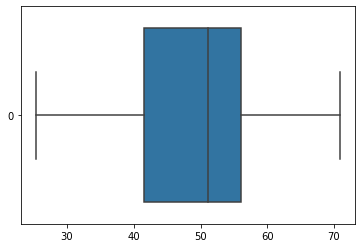

In [65]:
import seaborn as sns

ax = sns.boxplot(data=df['AXS'], orient="h")

#### Histogram of LTC closing price

Let's estimate the frequency distribution of LTC closing prices. 

**Observations**
- it shows the number of hours LTC had a certain value. For example, we can observe that LTC closing price was not over \$100 for many hours.
- it has right-skewed distribution because a natural limit prevents outcomes on one side.
- blue dotted line (median) shows that half of the closing prices were under 63.50\$.

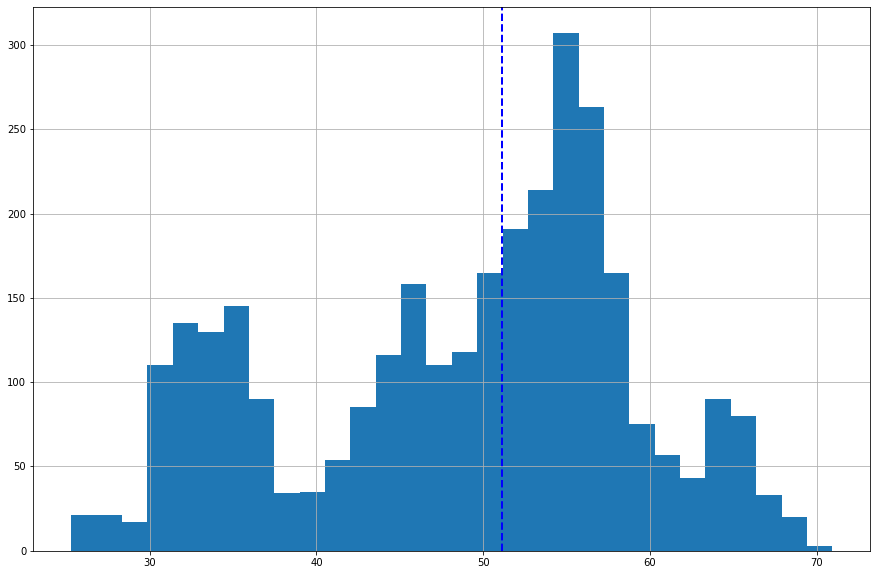

In [66]:
df['AXS'].hist(bins=30, figsize=(15,10)).axvline(df['AXS'].median(), color='b', linestyle='dashed', linewidth=2)

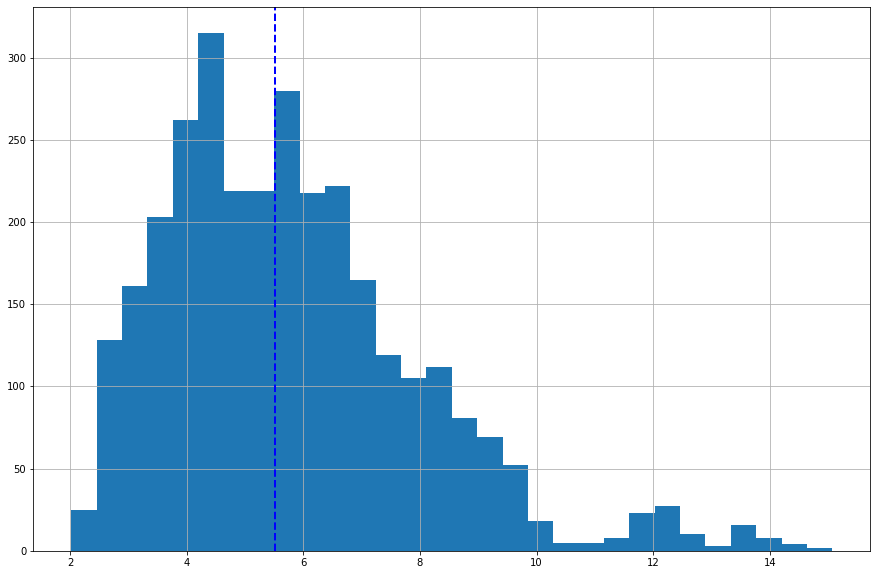

In [69]:
df['SAND'].hist(bins=30, figsize=(15,10)).axvline(df['SAND'].median(), color='b', linestyle='dashed', linewidth=2)

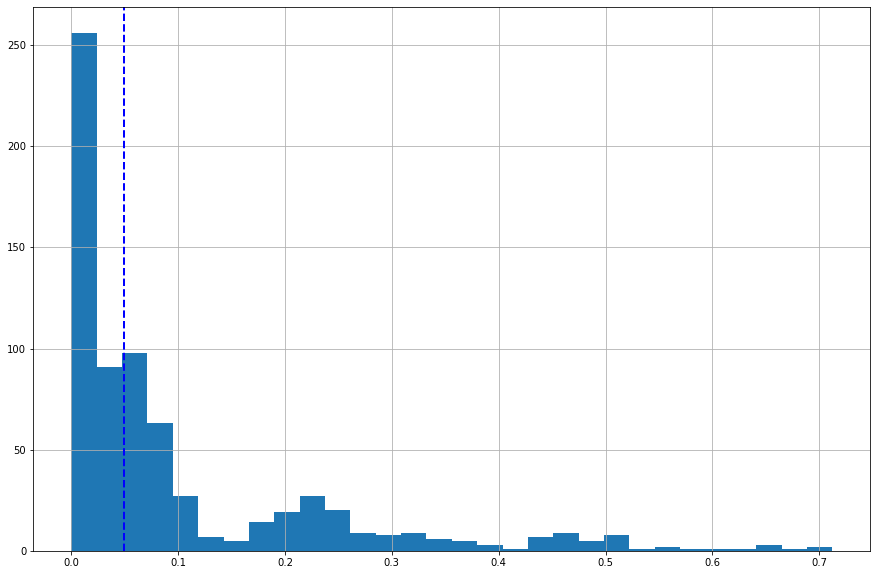

In [70]:
df['GALA'].hist(bins=30, figsize=(15,10)).axvline(df['GALA'].median(), color='b', linestyle='dashed', linewidth=2)

### Visualize absolute closing prices

The chart below shows absolute closing prices. 
It is not of much use as BTC closing prices are much higher 
then prices of ETH and LTC.

<AxesSubplot:>

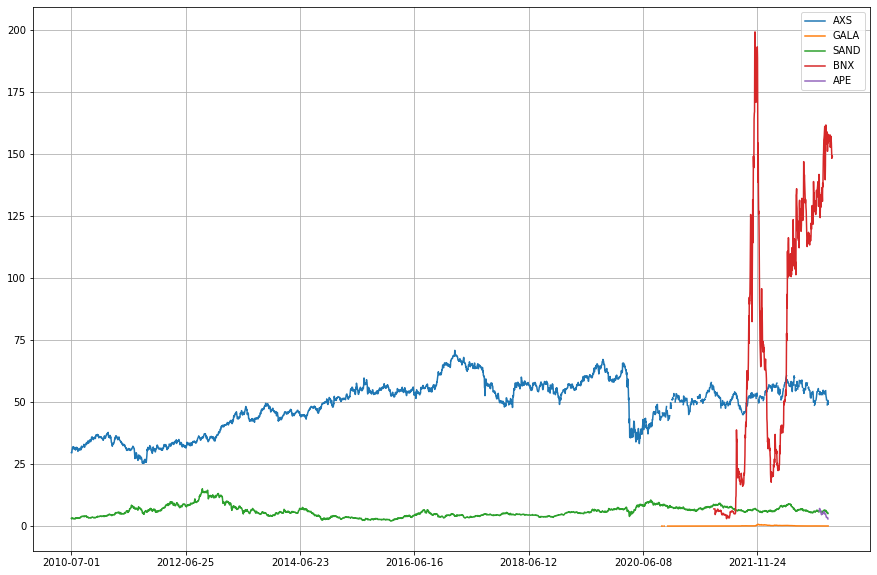

In [71]:
df.plot(grid=True, figsize=(15, 10))

### Visualize relative changes of closing prices

We are interested in a relative change of the price 
rather than in absolute price, so we use three different scales.

We see that closing prices move in tandem. When one coin closing price increases so do the other.

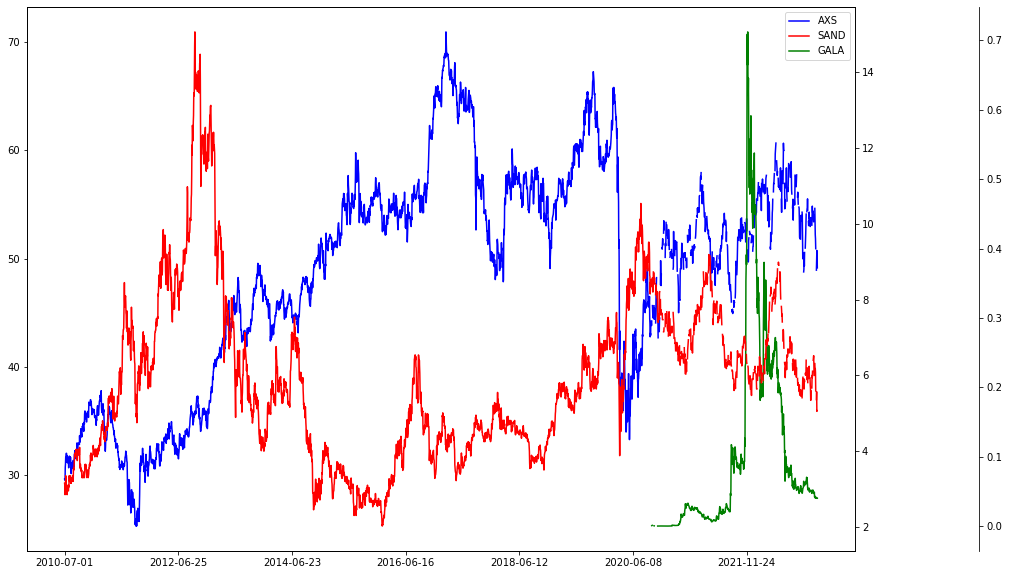

In [78]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['AXS'].plot(ax=ax1, style='b-')
df['SAND'].plot(ax=ax1, style='r-', secondary_y=True)
df['GALA'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['AXS', 'SAND', 'GALA'])

### Measure correlation of closing prices 

We calculate [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
between closing prices of BTC, ETH and LTC. 
Pearson correlation is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

[Sifr Data](https://www.sifrdata.com/cryptocurrency-correlation-matrix/) daily updates Pearson correlations for many cryptocurrencies.

**Observations**
- Corelation matrix is symetric so we only show the lower half. 
- BTC, ETH and LTC were highly correlated in past 2 months. This means, when BTC closing price increased, ETH and LTC followed. 
- ETH and LTC were even more correlated with 0.9565 Pearson correlation coefficient.

<AxesSubplot:>

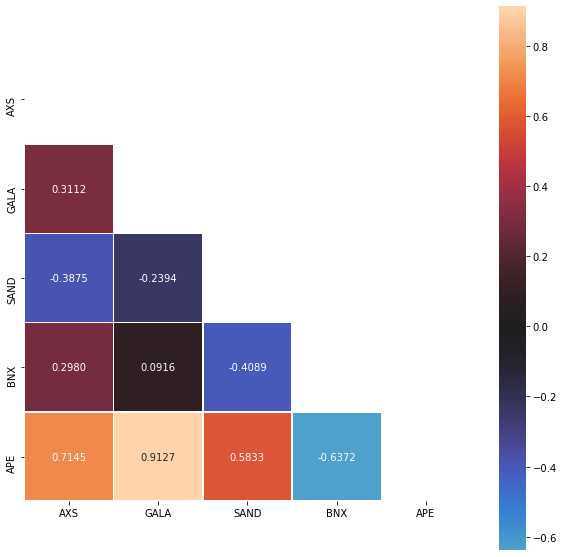

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## Buy and hold strategy

[Buy and hold](https://www.investopedia.com/terms/b/buyandhold.asp) is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period of time, regardless of fluctuations in the market. 

Let's analyze returns using buy and hold strategy for past 2.7 months. 
We calculate the return percentage, where $t$ represents a certain time period and $price_0$ is initial closing price:

$$
return_{t, 0} = \frac{price_t}{price_0}
$$

In [80]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,AXS,GALA,SAND,BNX,APE
2010-07-01,1.000000,NaN,1.000000,NaN,NaN
2010-07-02,0.997638,NaN,0.984127,NaN,NaN
2010-07-06,0.996626,NaN,0.904762,NaN,NaN
2010-07-07,1.037449,NaN,1.000000,NaN,NaN
2010-07-08,1.047234,NaN,1.000000,NaN,NaN


### Visualize returns

We show that LTC was the most profitable for time period between October 2, 2017 and December 24, 2017.

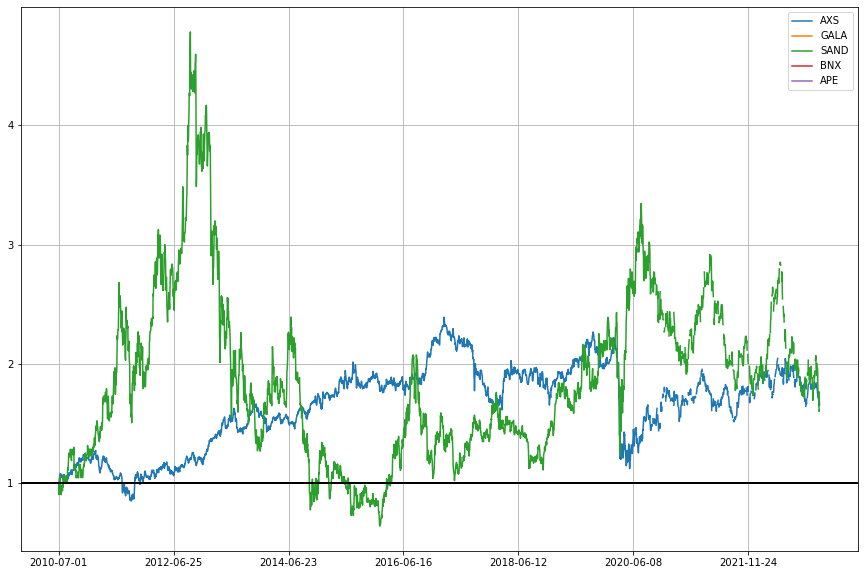

In [81]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

## Conclusion

The cryptocurrencies we analyzed fluctuated a lot but all of gained in given 2.7 months period.

### What is the percentage increase?

,AXS,GALA,SAND,BNX,APE
2019-10-02,2.206478,NaN,1.806349,NaN,NaN
2019-10-03,2.197031,NaN,1.803175,NaN,NaN
2019-10-04,2.201080,NaN,1.866667,NaN,NaN
2019-10-07,2.192645,NaN,1.850794,NaN,NaN
2019-10-08,2.122470,NaN,1.898413,NaN,NaN
...,...,...,...,...,...
2022-10-14,NaN,NaN,NaN,NaN,NaN
2022-10-15,NaN,NaN,NaN,NaN,NaN
2022-10-16,NaN,NaN,NaN,NaN,NaN
2022-10-17,NaN,NaN,NaN,NaN,NaN


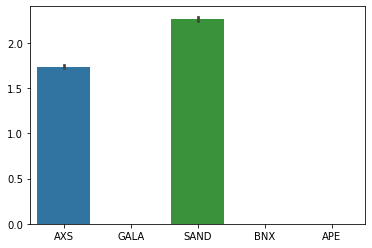

In [98]:
df_perc = df_return.tail(1000)
ax = sns.barplot(data=df_perc)
df_perc

### How many coins could we bought for $1000?

,AXS,GALA,SAND,BNX,APE
2010-07-01,33.738193,NaN,317.460317,NaN,NaN
2010-07-02,33.818059,NaN,322.580645,NaN,NaN
2010-07-06,33.852402,NaN,350.877193,NaN,NaN
2010-07-07,32.520325,NaN,317.460317,NaN,NaN
2010-07-08,32.216494,NaN,317.460317,NaN,NaN
...,...,...,...,...,...
2014-06-16,21.891419,NaN,159.744409,NaN,NaN
2014-06-17,21.673169,NaN,156.494523,NaN,NaN
2014-06-18,21.649708,NaN,150.150150,NaN,NaN
2014-06-19,21.824531,NaN,141.043724,NaN,NaN


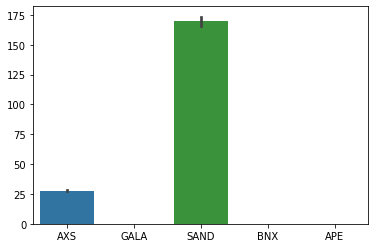

In [99]:
budget = 1000 # USD
df_coins = budget/df.head(1000)

ax = sns.barplot(data=df_coins)
df_coins

### How much money would we make?

,AXS,GALA,SAND,BNX,APE
2019-10-02,2206.477875,NaN,1806.349206,NaN,NaN
2019-10-03,2197.031214,NaN,1803.174603,NaN,NaN
2019-10-04,2201.079629,NaN,1866.666667,NaN,NaN
2019-10-07,2192.645081,NaN,1850.793651,NaN,NaN
2019-10-08,2122.469707,NaN,1898.412698,NaN,NaN
...,...,...,...,...,...
2022-10-14,NaN,NaN,NaN,NaN,NaN
2022-10-15,NaN,NaN,NaN,NaN,NaN
2022-10-16,NaN,NaN,NaN,NaN,NaN
2022-10-17,NaN,NaN,NaN,NaN,NaN


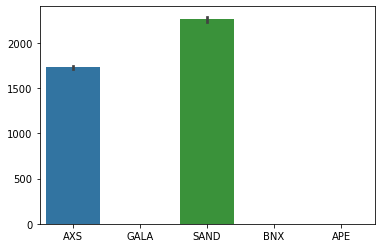

In [100]:
df_profit = df_return.tail(1000) * budget

ax = sns.barplot(data=df_profit)
df_profit